In [8]:
class AVLTree:
    # Constructor:
    def __init__(self,initval=None):
        self.value = initval
        if self.value:
            self.left = AVLTree()
            self.right = AVLTree()
            self.height = 1
        else:
            self.left = None
            self.right = None
            self.height = 0
        return

    def isempty(self):
        return (self.value == None)

    def isleaf(self):
        return (self.value != None and self.left.isempty() and self.right.isempty())

    def leftrotate(self):
        v = self.value
        vr = self.right.value
        tl = self.left
        trl = self.right.left
        trr = self.right.right
        newleft = AVLTree(v)
        newleft.left = tl
        newleft.right = trl
        self.value = vr
        self.right = trr
        self.left = newleft
        return

    def rightrotate(self):
        v = self.value
        vl = self.left.value
        tll = self.left.left
        tlr = self.left.right
        tr = self.right
        newright = AVLTree(v)
        newright.left = tlr
        newright.right = tr
        self.right = newright
        self.value = vl
        self.left = tll
        return


    def insert(self,v):
        if self.isempty():
            self.value = v
            self.left = AVLTree()
            self.right = AVLTree()
            self.height = 1
            return        
        if self.value == v:
            return        
        if v < self.value:
            self.left.insert(v)
            self.rebalance()
            self.height = 1 + max(self.left.height, self.right.height)            
        if v > self.value:
            self.right.insert(v)
            self.rebalance()            
            self.height = 1 + max(self.left.height, self.right.height)    
                              
    def rebalance(self):
        if self.left == None:
            hl = 0
        else:
            hl = self.left.height
        if self.right == None:
            hr = 0
        else:
            hr = self.right.height                        
        if  hl - hr > 1:
            if self.left.left.height > self.left.right.height:
                self.rightrotate()
            if self.left.left.height < self.left.right.height:
                self.left.leftrotate()
                self.rightrotate()
            self.updateheight()        
        if  hl - hr < -1:
            if self.right.left.height < self.right.right.height:
                self.leftrotate()
            if self.right.left.height > self.right.right.height:
                self.right.rightrotate()
                self.leftrotate()
            self.updateheight()
            
    def updateheight(self):
        if self.isempty():
            return
        else:
            self.left.updateheight()
            self.right.updateheight()
            self.height = 1 + max(self.left.height, self.right.height)       
   
        
    def inorder(self):
        if self.isempty():
            return([])
        else:
            return(self.left.inorder()+ [self.value]+ self.right.inorder())
    def preorder(self):
        if self.isempty():
            return([])
        else:
            return([self.value] + self.left.preorder()+  self.right.preorder())
    def postorder(self):
        if self.isempty():
            return([])
        else:
            return(self.left.postorder()+ self.right.postorder() + [self.value])

A = AVLTree()
from random import randint
nodes = [randint(a=100, b = 1000) for i in range(15)]
for i in nodes:
    A.insert(i)

print(A.inorder())
print(A.preorder())
print(A.postorder())

[193, 283, 308, 355, 358, 391, 474, 509, 554, 602, 609, 637, 719, 780, 911]
[391, 308, 193, 283, 358, 355, 719, 602, 509, 474, 554, 637, 609, 780, 911]
[283, 193, 355, 358, 308, 474, 554, 509, 609, 637, 602, 911, 780, 719, 391]


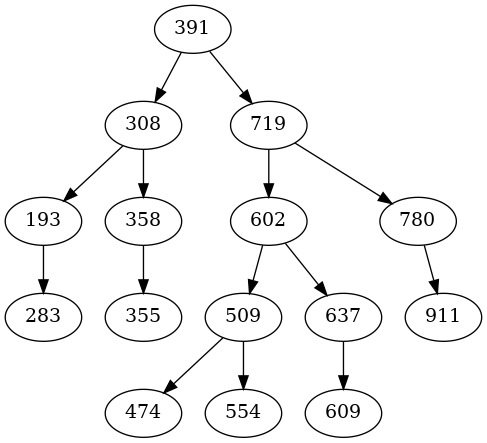

In [9]:
from graphviz import Digraph
import os 
import uuid
from IPython.display import Image
class AVLTreeVisualizer:
    def __init__(self, root):
        self.root = root
        self.graph = Digraph()

    def add_edges(self, node):
        if node.isempty():
            return
        if not node.left.isempty():
            self.graph.edge(str(node.value), str(node.left.value))
            self.add_edges(node.left)
        if not node.right.isempty():
            self.graph.edge(str(node.value), str(node.right.value))
            self.add_edges(node.right)

    def visualize(self):
        self.add_nodes(self.root)
        self.add_edges(self.root)
        return self.graph

    def add_nodes(self, node):
        if node.isempty():
            return
        self.graph.node(str(node.value))
        self.add_nodes(node.left)
        self.add_nodes(node.right)

# Visualize AVL tree
visualizer = AVLTreeVisualizer(A)
graph = visualizer.visualize()

# Generate a UUID
unique_id = uuid.uuid4()

# Convert UUID to a string
unique_id_str = str(unique_id)

# Create a file path using the UUID string
file_path = os.path.join(os.getcwd(), f"{unique_id_str}.png")

# Render and save the graph
graph.render(unique_id_str, format='png', view=False)

# Display the image
Image(file_path)